In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os, sys
import datetime
from utils.mining_data_tb import normalize_dataframe
from utils.mining_data_tb import count_numbers_in_column
from utils.mining_data_tb import drop_quot_marks
from utils.mining_data_tb import year_timeseries

In [123]:
fleet = pd.read_csv("../Data/Datasets/US_MerchantFleet.csv")
fleet

,Year,Economy,Economy Label,ShipType,ShipType Label,Dead weight tons in thousands,Dead weight tons in thousands Footnote,Percentage of total world,Percentage of total world Footnote,Percentage of total fleet,Percentage of total fleet Footnote,Number of ships,Number of ships Footnote,Gross Tonnage in thousands,Gross Tonnage in thousands Footnote
0,1980,0000,World,0,Total fleet,672142.488,NaN,100.000000,NaN,100.00000,NaN,NaN,NaN,NaN,NaN
1,1980,0000,World,1,Oil tankers,337895.557,NaN,100.000000,NaN,50.27142,NaN,NaN,NaN,NaN,NaN
2,1980,0000,World,2,Bulk carriers,181880.282,NaN,100.000000,NaN,27.05978,NaN,NaN,NaN,NaN,NaN
3,1980,0000,World,3,General cargo,112840.897,NaN,100.000000,NaN,16.78824,NaN,NaN,NaN,NaN,NaN
4,1980,0000,World,4,Container ships,10290.114,NaN,100.000000,NaN,1.53094,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79868,2020,926,United Kingdom,1,Oil tankers,6537.655,NaN,1.086812,NaN,18.06229,NaN,99.0,NaN,3793.935,NaN
79869,2020,926,United Kingdom,2,Bulk carriers,18563.805,NaN,2.111130,NaN,51.28824,NaN,147.0,NaN,9834.549,NaN
79870,2020,926,United Kingdom,3,General cargo,921.849,NaN,1.210736,NaN,2.54689,NaN,116.0,NaN,1207.270,NaN
79871,2020,926,United Kingdom,4,Container ships,4230.842,NaN,1.539291,NaN,11.68901,NaN,59.0,NaN,3874.507,NaN


In [124]:
# We look for columns that have got more null values in order to get rid of them if not needed
fleet.isna().sum()

Year                                          0
Economy                                       0
Economy Label                                 0
ShipType                                      0
ShipType Label                                0
Dead weight tons in thousands                 0
Dead weight tons in thousands Footnote    79873
Percentage of total world                     0
Percentage of total world Footnote        79873
Percentage of total fleet                     0
Percentage of total fleet Footnote        79873
Number of ships                           56857
Number of ships Footnote                  79873
Gross Tonnage in thousands                56857
Gross Tonnage in thousands Footnote       79873
dtype: int64

In [125]:
fleet = fleet.drop(fleet[['Dead weight tons in thousands Footnote', 'Percentage of total world Footnote', 'Percentage of total fleet Footnote', 'Number of ships Footnote', 'Gross Tonnage in thousands', 'Gross Tonnage in thousands Footnote']], axis= 1)
fleet.to_csv('../Data/Cleaned_Data/cleaned_fleet.csv')

In [126]:
sea_trade = pd.read_csv('../Data/Datasets/US_seabornetrade.csv', sep=',', header= None)
sea_trade

,0
0,MEASURE - Metric tons in millions
1,",YEAR,""1970"",""1971"",""1972"",""1973"",""1974"",""1975..."
2,"ECONOMY,""CARGO TYPE"","
3,"World,""Crude oil loaded"",1207,1210,1321,1514,1..."
4,"World,""Other tanker trade loaded"",233,320,332,..."
...,...
158,"Developing economies: Asia and Oceania,""Total ..."
159,"Developing economies: Asia and Oceania,""Crude ..."
160,"Developing economies: Asia and Oceania,""Other ..."
161,"Developing economies: Asia and Oceania,""Dry ca..."


In [127]:
sea_trade = normalize_dataframe(sea_trade, sep= ',')

In [128]:
sea_trade = sea_trade.T
sea_trade = sea_trade.drop(sea_trade.index[0])

In [129]:
sea_trade.columns = sea_trade.iloc[0,:]
sea_trade.index = sea_trade['YEAR']
sea_trade = sea_trade.drop(sea_trade.index[0])
sea_trade = sea_trade.iloc[:,:8]
sea_trade = sea_trade.drop(columns=['"CARGO TYPE"'], axis=1)
sea_trade.to_csv('../Data/Cleaned_Data/cleaned_sea_trade.csv')

In [130]:
# We are going to make separate dataframes for Developing economies and Developed countries
sea_trade = pd.read_csv('../Data/Datasets/US_seabornetrade.csv', sep=',', header= None)
sea_trade = normalize_dataframe(sea_trade, sep= ',')
developed_seatrade = sea_trade.loc[(sea_trade['MEASURE - Metric tons in millions'] == '  Developed economies: Europe') | (sea_trade['MEASURE - Metric tons in millions'] =='  Developed economies: America') | (sea_trade['MEASURE - Metric tons in millions'] == '  Developed economies: Asia')]
developed_seatrade = developed_seatrade.T
developed_seatrade = developed_seatrade.reset_index()
developed_seatrade = developed_seatrade.drop(developed_seatrade.index[2:38])
developed_seatrade = developed_seatrade.drop(developed_seatrade.index[0])
dev_columns = developed_seatrade.iloc[0,:]
developed_seatrade.columns = dev_columns
developed_seatrade = developed_seatrade.drop(developed_seatrade.index[0])
developed_seatrade['Year'] = np.arange(2006, 2020, 1)
developed_seatrade.set_index(developed_seatrade.Year, drop= True)

1,NaN,"""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded""","""Dry cargo unloaded""","""Total goods unloaded""","""Crude oil loaded""",...,"""Total goods unloaded""","""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded""","""Dry cargo unloaded""","""Total goods unloaded""",Year
Year,,,,,,,,,,,,,,,,,,,,,
2006,None,22.155,86.36883,436.8455,545.3693,500.962,155.6702,492.116,1148.748,0,...,863.3129,100.8517,235.7976,768.5816,1105.231,535.563,282.146,1246.117,2063.826,2006
2007,None,24.85059,91.3018,516.7054000000001,632.8578,513.5112,156.0599,453.1337,1122.705,0,...,862.6409,96.93955,253.3003,776.6066,1126.847,492.2178,262.1938,1154.745,1909.156,2007
2008,None,24.10564,119.0063,549.4106,692.5225,481.2886,138.8701,414.3273,1034.486,0,...,896.2480000000001,88.21299000000001,261.5034,751.0905,1100.807,487.8916,272.9699,1213.14,1974.002,2008
2009,None,23.87981,123.7551,498.4981,646.133,445.184,131.997,306.4256,883.6066,0,...,710.0365000000001,78.13605,236.0426,693.7918,1007.97,467.9213,281.7665,934.9608,1684.649,2009
2010,None,25.4863,126.9477,523.0956,675.5296,463.4844,135.2078,334.9873,933.6795,0,...,783.183,83.58265,262.791,720.2599,1066.634,478.0392,280.5125,1012.188,1770.74,2010
2011,None,24.25508,154.3536,563.9976,742.6063,413.0394,113.8838,368.5546,895.4779,0,...,778.8150000000001,77.88773000000001,269.7583,748.681,1096.327,457.9005,336.5072,1049.658,1844.066,2011
2012,None,30.72732,137.445,626.8079,794.9802,401.775,112.092,378.496,892.3630000000001,0,...,803.907,78.91007999999999,287.2125,780.452,1146.575,468.0003,324.0652,1054.423,1846.488,2012
2013,None,33.72732,136.4186,650.148,820.294,356.3,102.3,431.342,889.942,0,...,836.422,66.22959,285.4708,795.2031,1146.904,434.5324,325.6679,1059.606,1819.807,2013
2014,None,43.05523,139.6823,640.0473,822.7848,313.3389,102.6611,420.2001,836.2000000000001,0,...,854.047,66.642,271.2255,769.3929000000001,1107.26,434.6,306.8352,1115.8,1857.235,2014


In [131]:
from utils.mining_data_tb import convert_df_toint

In [132]:
developed_seatrade = convert_df_toint(developed_seatrade)
developed_seatrade = developed_seatrade.groupby(developed_seatrade.columns, axis=1).sum()
developed_seatrade.set_index('Year', drop= True)

1,"""Crude oil loaded""","""Crude oil unloaded""","""Dry cargo loaded""","""Dry cargo unloaded""","""Other tanker trade loaded""","""Other tanker trade unloaded""","""Total goods loaded""","""Total goods unloaded"""
Year,,,,,,,,
2006.0,123.00670,1255.7810,1358.5558,2297.8599,332.18322,522.24620,1813.7458,4075.8869
2007.0,121.79014,1218.9860,1454.5596,2168.7966,359.01300,506.71970,1935.3633,3894.5019
2008.0,112.31863,1223.8302,1462.5501,2176.2633,401.46049,504.64200,1976.3293,3904.7360
2009.0,102.01586,1103.8527,1332.0599,1658.4060,379.07170,516.03300,1813.1470,3278.2921
2010.0,109.06895,1133.6316,1394.5615,1827.6153,414.21070,526.35530,1917.8416,3487.6025
2011.0,102.14281,1058.0704,1459.4616,1896.3261,441.53090,563.96200,2003.1353,3518.3589
2012.0,109.63740,1060.7113,1573.2249,1944.2990,439.16750,537.74820,2122.0302,3542.7580
2013.0,99.95691,980.1824,1620.3151,2032.8490,435.74040,533.13890,2156.0130,3546.1710
2014.0,109.69723,937.0109,1579.8542,2110.2041,425.50880,500.26730,2115.0598,3547.4820


In [133]:
developed_seatrade.to_csv('../Data/Def_Data/Dev_countries_Seatrade.csv')

In [134]:
brent = pd.read_csv('../Data/Datasets/BrentOilPrices.csv')
brent

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


In [135]:
brent['Date'] = pd.to_datetime(brent['Date'])
brent.to_csv('../Data/Def_Data/Brent_price.csv')

In [136]:
GDP_Total = pd.read_csv('../Data/Def_Data/US_GDPTota.csv', header=None)

In [137]:
GDP_Title = GDP_Total.iloc[0, :]
GDP_Total= normalize_dataframe(GDP_Total, sep=',')
GDP_Total = GDP_Total.iloc[:, :-1]
GDP_Total.columns = GDP_Title

In [138]:
# We want to see all the labels in the columns of Economy label to see which ones can be of our interest
GDP_Total['Economy Label'].unique()

array(['"World"', '"Afghanistan"', '"Albania"', '"Algeria"', '"Andorra"',
       '"Angola"', '"Antigua and Barbuda"', '"Argentina"', '"Australia"',
       '"Austria"', '"Bahamas"', '"Bahrain"', '"Bangladesh"',
       '"Barbados"', '"Belgium"', '"Bermuda"', '"Bhutan"',
       '"Bolivia (Plurinational State of)"', '"Botswana"', '"Brazil"',
       '"Belize"', '"Solomon Islands"', '"British Virgin Islands"',
       '"Brunei Darussalam"', '"Bulgaria"', '"Myanmar"', '"Burundi"',
       '"Cambodia"', '"Cameroon"', '"Canada"', '"Cabo Verde"',
       '"Cayman Islands"', '"Central African Republic"', '"Sri Lanka"',
       '"Chad"', '"Chile"', '"China"', '"China', '"Colombia"',
       '"Comoros"', '"Congo"', '"Congo', '"Cook Islands"', '"Costa Rica"',
       '"Cuba"', '"Cyprus"', '"Czechoslovakia"', '"Benin"', '"Denmark"',
       '"Developed economies: Asia and Oceania"',
       '"Developing economies: Asia and Oceania"',
       '"Developed economies: Asia"', '"Developing economies: Asia"',
     

In [139]:
GDP_world = GDP_Total[GDP_Total['Economy Label'] == '"World"']
GDP_world = GDP_world.drop(columns=['Series','US dollars at current prices in millions Footnote', 'US dollars at current prices per capita Footnote', 'US dollars at constant prices (2015) in millions Footnote', 'US dollars at constant prices (2015) per capita Footnote' ])
GDP_world = GDP_world.reset_index(drop=True)
GDP_G20 = GDP_Total[GDP_Total['Economy Label'] == '"G20 (Group of Twenty)"']
GDP_G20 = GDP_G20.drop(columns=['Series','US dollars at current prices in millions Footnote', 'US dollars at current prices per capita Footnote', 'US dollars at constant prices (2015) in millions Footnote', 'US dollars at constant prices (2015) per capita Footnote' ])

In [140]:
GDP_world.to_csv('../Data/Def_Data/GDP_world.csv')
GDP_G20.to_csv('../Data/Def_Data/GDP_G20.csv')

In [141]:
BDI = pd.read_excel('../Data/Datasets/BDIY.xlsx')
BDI = BDI.drop(BDI.index[:8])
BDI = BDI.reset_index(drop=True)
BDI.columns = ['Date', 'Price']
BDI

,Date,Price
0,1992-10-14,1048.0
1,1992-10-15,1049.0
2,1992-10-16,1053.0
3,1992-10-19,1055.0
4,1992-10-20,1060.0
...,...,...
7159,2021-05-13,3077.0
7160,2021-05-14,2939.0
7161,2021-05-17,2856.0
7162,2021-05-18,2795.0


In [142]:
# BDI index needs to be converted to years in order that it can be compared with other data sources
BDI['Date'] = pd.to_datetime(BDI['Date'])
BDI = BDI.set_index(BDI['Date'])
BDI_yearly = BDI.resample('Y').mean()

In [143]:
BDI_yearly.to_csv('../Data/Def_Data/BDI_yearly.csv')

In [144]:
# Now that all the data is wrangled, we´ll proceed to clean it

In [145]:
df_fleet = pd.read_csv('../Data/Cleaned_Data/cleaned_fleet.csv')

In [146]:
df_fleet = df_fleet[df_fleet['Economy Label'] == 'World']
df_fleet

,Unnamed: 0,Year,Economy,Economy Label,ShipType,ShipType Label,Dead weight tons in thousands,Percentage of total world,Percentage of total fleet,Number of ships
0,0,1980,0000,World,0,Total fleet,672142.488,100.0,100.00000,NaN
1,1,1980,0000,World,1,Oil tankers,337895.557,100.0,50.27142,NaN
2,2,1980,0000,World,2,Bulk carriers,181880.282,100.0,27.05978,NaN
3,3,1980,0000,World,3,General cargo,112840.897,100.0,16.78824,NaN
4,4,1980,0000,World,4,Container ships,10290.114,100.0,1.53094,NaN
...,...,...,...,...,...,...,...,...,...,...
77552,77552,2020,0000,World,1,Oil tankers,601544.100,100.0,29.07457,11201.0
77553,77553,2020,0000,World,2,Bulk carriers,879330.459,100.0,42.50088,11965.0
77554,77554,2020,0000,World,3,General cargo,76139.507,100.0,3.68007,19116.0
77555,77555,2020,0000,World,4,Container ships,274856.487,100.0,13.28470,5371.0


In [147]:
# We want to compare then fleet growth with sea trade. so we are going to get the values shptype Label = Total fleet for that matter
total_fleet_growth = df_fleet[df_fleet['ShipType Label']== 'Total fleet']
total_fleet_growth

,Unnamed: 0,Year,Economy,Economy Label,ShipType,ShipType Label,Dead weight tons in thousands,Percentage of total world,Percentage of total fleet,Number of ships
0,0,1980,0000,World,0,Total fleet,672142.488,100.0,100.0,NaN
1743,1743,1981,0000,World,0,Total fleet,679704.794,100.0,100.0,NaN
3474,3474,1982,0000,World,0,Total fleet,686028.910,100.0,100.0,NaN
5218,5218,1983,0000,World,0,Total fleet,690093.141,100.0,100.0,NaN
6964,6964,1984,0000,World,0,Total fleet,681538.852,100.0,100.0,NaN
8724,8724,1985,0000,World,0,Total fleet,668140.139,100.0,100.0,NaN
10500,10500,1986,0000,World,0,Total fleet,654327.406,100.0,100.0,NaN
12265,12265,1987,0000,World,0,Total fleet,632237.783,100.0,100.0,NaN
14065,14065,1988,0000,World,0,Total fleet,625045.766,100.0,100.0,NaN
15857,15857,1989,0000,World,0,Total fleet,620734.240,100.0,100.0,NaN


In [148]:
df_fleet = df_fleet.groupby(['Year','ShipType Label'])[['Dead weight tons in thousands', 'Percentage of total fleet', 'Number of ships']].sum()
df_fleet

Dead weight tons in thousands  \
Year ShipType Label                                        
1980 Bulk carriers                            181880.282   
     Container ships                           10290.114   
     General cargo                            112840.897   
     Oil tankers                              337895.557   
     Other types of ships                      29235.638   
...                                                  ...   
2020 Container ships                          274856.487   
     General cargo                             76139.507   
     Oil tankers                              601544.100   
     Other types of ships                     237099.636   
     Total fleet                             2068970.188   

                           Percentage of total fleet  Number of ships  
Year ShipType Label                                                    
1980 Bulk carriers                          27.05978              0.0  
     Container ships                         1.53094              0.0  
     General cargo                          16.78824              0.0  
     Oil tankers                            50.27142              0.0  
     Other types of ships                    4.34962              0.0  
...                                              ...              ...  
2020 Container ships                        13.28470           5371.0  
     General cargo                           3.68007          19116.0  
     Oil tankers                            29.07457          11201.0  
     Other types of ships                   11.45979          50487.0  
     Total fleet                           100.00000          98140.0  

[246 rows x 3 columns]

In [149]:
df_fleet.to_csv('../Data/Def_Data/df_fleet.csv')

In [150]:
df_sea_trade = pd.read_csv('../Data/Cleaned_Data/cleaned_sea_trade.csv')
df_sea_trade

,YEAR,YEAR.1,"""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded"""
0,"""1970""","""1970""",1207.000,233.0000,1165.000,2605.000,1101.000,298.0000
1,"""1971""","""1971""",1210.000,320.0000,1162.000,2692.000,1199.000,300.0000
2,"""1972""","""1972""",1321.000,332.0000,1221.000,2874.000,1325.000,316.0000
3,"""1973""","""1973""",1514.000,353.0000,1407.000,3274.000,1521.000,339.0000
4,"""1974""","""1974""",1497.000,335.0000,1472.000,3304.000,1470.000,312.0000
5,"""1975""","""1975""",1364.000,280.0000,1428.000,3072.000,1373.000,287.0000
6,"""1976""","""1976""",1555.000,289.0000,1522.000,3366.000,1522.000,312.0000
7,"""1977""","""1977""",1599.000,293.0000,1576.000,3468.000,1585.000,321.0000
8,"""1978""","""1978""",1604.000,296.0000,1650.000,3550.000,1634.000,321.0000
9,"""1979""","""1979""",1725.000,318.0000,1785.000,3828.000,1724.000,308.0000


In [151]:
df_sea_trade = df_sea_trade.drop(columns=['YEAR.1'], axis=1)
df_sea_trade = drop_quot_marks(df_sea_trade, 'YEAR')
df_sea_trade['YEAR'] = pd.to_datetime(df_sea_trade['YEAR'])
df_sea_trade

,YEAR,"""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded"""
0,1970-01-01,1207.000,233.0000,1165.000,2605.000,1101.000,298.0000
1,1971-01-01,1210.000,320.0000,1162.000,2692.000,1199.000,300.0000
2,1972-01-01,1321.000,332.0000,1221.000,2874.000,1325.000,316.0000
3,1973-01-01,1514.000,353.0000,1407.000,3274.000,1521.000,339.0000
4,1974-01-01,1497.000,335.0000,1472.000,3304.000,1470.000,312.0000
5,1975-01-01,1364.000,280.0000,1428.000,3072.000,1373.000,287.0000
6,1976-01-01,1555.000,289.0000,1522.000,3366.000,1522.000,312.0000
7,1977-01-01,1599.000,293.0000,1576.000,3468.000,1585.000,321.0000
8,1978-01-01,1604.000,296.0000,1650.000,3550.000,1634.000,321.0000
9,1979-01-01,1725.000,318.0000,1785.000,3828.000,1724.000,308.0000


In [152]:
df_sea_trade.to_csv('../Data/Def_Data/df_sea_trade.csv')

In [153]:
Brent = pd.read_csv('../Data/Def_Data/Brent_price.csv')
Brent = Brent.drop(columns=['Unnamed: 0'], axis= 1)
Brent['Date'] = pd.to_datetime(Brent['Date'])
Brent = Brent.set_index(Brent['Date'])
Brent_yearly = Brent.resample('Y').mean()

In [154]:
# We want to compare Brent price with BDI index so we need to convert timeseries to years tto make a slice from 1992 which is the first date for BDI
Brent_yearly.index = pd.to_datetime(Brent_yearly.index)
Brent_yearly = year_timeseries(Brent_yearly)
Brent_yearly = Brent_yearly.loc[1992:]
Brent_yearly = Brent_yearly.rename(columns={'Price': 'Brent price'})
Brent_yearly

,Brent price
1992,19.319728
1993,17.013413
1994,15.856389
1995,17.015850
1996,20.639803
1997,19.108508
1998,12.758103
1999,17.901566
2000,28.660672
2001,24.455720


In [155]:
BDI_yearly = pd.read_csv('../Data/Def_Data/BDI_yearly.csv')
BDI_yearly['Date'] = pd.to_datetime(BDI_yearly['Date'])
BDI_yearly = BDI_yearly.set_index(BDI_yearly['Date'], drop= True)
BDI_yearly = BDI_yearly.rename(columns={'Date':'Fecha', 'Price':'TCE Price'})
BDI_yearly = BDI_yearly.drop(columns= ['Fecha'], axis=1)
BDI_yearly = year_timeseries(BDI_yearly)


In [156]:
# Now we can concatenate them in the same dataframe
Brent_Bdi = pd.concat([Brent_yearly, BDI_yearly],axis= 1)
Brent_Bdi

,Brent price,TCE Price
1992,19.319728,1235.363636
1993,17.013413,1399.300395
1994,15.856389,1477.567460
1995,17.015850,1980.753968
1996,20.639803,1313.837945
1997,19.108508,1335.608696
1998,12.758103,945.234127
1999,17.901566,1063.044000
2000,28.660672,1607.801587
2001,24.455720,1216.601594


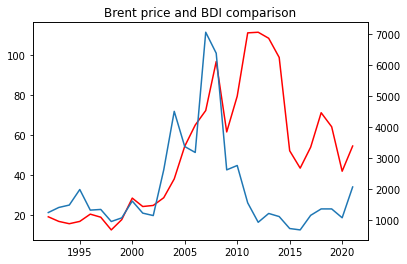

<Figure size 432x288 with 0 Axes>

In [157]:
x = Brent_Bdi.index
y1 = Brent_Bdi['Brent price']
y2 = Brent_Bdi['TCE Price']

fig, ax1= plt.subplots()
ax1.plot(x, y1, label= 'Brent price', color= 'r')
ax2 = ax1.twinx()
ax2.plot(x, y2)
plt.title('Brent price and BDI comparison')
plt.show()
plt.savefig('../Resources/BrentvsBDI.png')

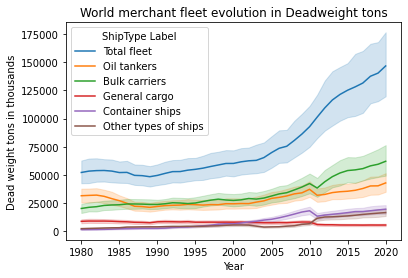

In [158]:
sns.lineplot(data=fleet, x='Year', y= 'Dead weight tons in thousands', hue='ShipType Label')
plt.title('World merchant fleet evolution in Deadweight tons')
plt.savefig('../Resources/World_fleet_evol.png')

In [159]:
# Not all the year have a registerd number of ships. Therefore a new chart will be done with years that actually contains them
fleet_shipNo = fleet.dropna()
fleet_shipNo

,Year,Economy,Economy Label,ShipType,ShipType Label,Dead weight tons in thousands,Percentage of total world,Percentage of total fleet,Number of ships
56857,2011,0000,World,0,Total fleet,1418382.288,100.000000,100.00000,83283.0
56858,2011,0000,World,1,Oil tankers,440110.812,100.000000,31.02907,10609.0
56859,2011,0000,World,2,Bulk carriers,547191.632,100.000000,38.57857,8228.0
56860,2011,0000,World,3,General cargo,82413.995,100.000000,5.81042,21090.0
56861,2011,0000,World,4,Container ships,183691.408,100.000000,12.95077,4966.0
...,...,...,...,...,...,...,...,...,...
79868,2020,926,United Kingdom,1,Oil tankers,6537.655,1.086812,18.06229,99.0
79869,2020,926,United Kingdom,2,Bulk carriers,18563.805,2.111130,51.28824,147.0
79870,2020,926,United Kingdom,3,General cargo,921.849,1.210736,2.54689,116.0
79871,2020,926,United Kingdom,4,Container ships,4230.842,1.539291,11.68901,59.0


In [160]:
# Now we want to calculate the average Deadweight per ship
fleet_shipNo['Avge Deadweight per ship'] = fleet_shipNo['Dead weight tons in thousands'] / fleet_shipNo['Number of ships']
fleet_shipNo['Year'] = pd.to_datetime(fleet_shipNo['Year'], format= '%Y')

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
fleet_shipNo

,Year,Economy,Economy Label,ShipType,ShipType Label,Dead weight tons in thousands,Percentage of total world,Percentage of total fleet,Number of ships,Avge Deadweight per ship
56857,2011-01-01,0000,World,0,Total fleet,1418382.288,100.000000,100.00000,83283.0,17.030874
56858,2011-01-01,0000,World,1,Oil tankers,440110.812,100.000000,31.02907,10609.0,41.484665
56859,2011-01-01,0000,World,2,Bulk carriers,547191.632,100.000000,38.57857,8228.0,66.503601
56860,2011-01-01,0000,World,3,General cargo,82413.995,100.000000,5.81042,21090.0,3.907729
56861,2011-01-01,0000,World,4,Container ships,183691.408,100.000000,12.95077,4966.0,36.989812
...,...,...,...,...,...,...,...,...,...,...
79868,2020-01-01,926,United Kingdom,1,Oil tankers,6537.655,1.086812,18.06229,99.0,66.036919
79869,2020-01-01,926,United Kingdom,2,Bulk carriers,18563.805,2.111130,51.28824,147.0,126.284388
79870,2020-01-01,926,United Kingdom,3,General cargo,921.849,1.210736,2.54689,116.0,7.946974
79871,2020-01-01,926,United Kingdom,4,Container ships,4230.842,1.539291,11.68901,59.0,71.709186


In [191]:
total_fleet_shipNo = fleet_shipNo[fleet_shipNo['ShipType Label']== 'Total fleet']
total_fleet_shipNo['Year'] = pd.DatetimeIndex(total_fleet_shipNo['Year']).year
total_fleet_shipNo 

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Economy,Economy Label,ShipType,ShipType Label,Dead weight tons in thousands,Percentage of total world,Percentage of total fleet,Number of ships,Avge Deadweight per ship
56857,2011,0000,World,0,Total fleet,1418382.288,100.000000,100.0,83283.0,17.030874
56863,2011,0000u,World n.e.s.,0,Total fleet,3941.334,0.277875,100.0,1157.0,3.406512
56869,2011,004,Afghanistan,0,Total fleet,0.500,0.000035,100.0,1.0,0.500000
56875,2011,008,Albania,0,Total fleet,93.876,0.006619,100.0,68.0,1.380529
56881,2011,012,Algeria,0,Total fleet,793.219,0.055924,100.0,104.0,7.627106
...,...,...,...,...,...,...,...,...,...,...
79843,2020,858,Uruguay,0,Total fleet,43.121,0.002084,100.0,60.0,0.718683
79849,2020,862,Venezuela (Bolivarian Rep. of),0,Total fleet,1559.900,0.075395,100.0,282.0,5.531560
79855,2020,882,Samoa,0,Total fleet,8.022,0.000388,100.0,12.0,0.668500
79861,2020,887,Yemen,0,Total fleet,441.360,0.021332,100.0,33.0,13.374545


In [195]:
total_fleet_shipNo = total_fleet_shipNo[total_fleet_shipNo['Economy Label']== 'World'] 
total_fleet_shipNo

,Year,Economy,Economy Label,ShipType,ShipType Label,Dead weight tons in thousands,Percentage of total world,Percentage of total fleet,Number of ships,Avge Deadweight per ship
56857,2011,0000,World,0,Total fleet,1418382.288,100.0,100.0,83283.0,17.030874
59143,2012,0000,World,0,Total fleet,1537483.858,100.0,100.0,84709.0,18.150183
61429,2013,0000,World,0,Total fleet,1634029.806,100.0,100.0,86668.0,18.853900
63721,2014,0000,World,0,Total fleet,1694519.096,100.0,100.0,87950.0,19.266846
66007,2015,0000,World,0,Total fleet,1753091.944,100.0,100.0,90470.0,19.377605
68299,2016,0000,World,0,Total fleet,1811526.385,100.0,100.0,92074.0,19.674679
70609,2017,0000,World,0,Total fleet,1868173.754,100.0,100.0,93521.0,19.975981
72925,2018,0000,World,0,Total fleet,1937777.023,100.0,100.0,95653.0,20.258403
75229,2019,0000,World,0,Total fleet,1988305.075,100.0,100.0,96698.0,20.562008
77551,2020,0000,World,0,Total fleet,2068970.188,100.0,100.0,98140.0,21.081824


In [162]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

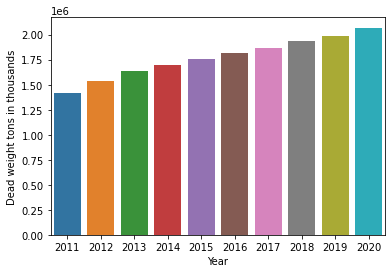

In [206]:
sns.barplot(data= total_fleet_shipNo, x= 'Year', y= 'Dead weight tons in thousands')
plt.savefig('../Resources/Total_fleet_deadweight_evol.png')

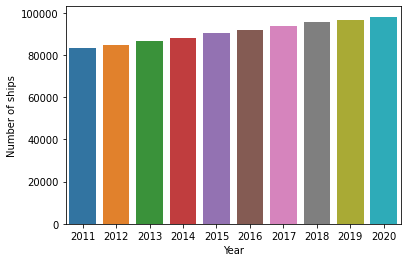

In [205]:
sns.barplot(data = total_fleet_shipNo, x=total_fleet_shipNo['Year'], y='Number of ships')
plt.savefig('../Resources/Number_of_ships.png')

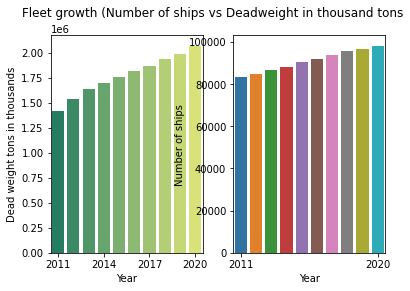

In [200]:

fig, (ax1, ax2) =plt.subplots(1,2)
fig.suptitle('Fleet growth (Number of ships vs Deadweight in thousand tons')
sns.barplot(data= total_fleet_shipNo, x=total_fleet_shipNo['Year'], y='Dead weight tons in thousands' , palette='summer', ax=ax1)
sns.barplot(data = total_fleet_shipNo, x=total_fleet_shipNo['Year'], y='Number of ships',   ax=ax2)

ax1.set_xticks(ax1.get_xticks()[::3])
ax2.set_xticks(ax1.get_xticks()[::3])

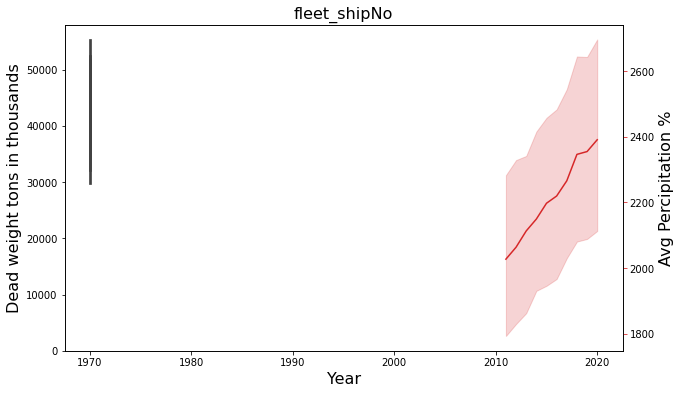

<Figure size 432x288 with 0 Axes>

In [164]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('fleet_shipNo', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Dead weight tons in thousands', fontsize=16)
ax1 = sns.barplot(data = fleet_shipNo, x=fleet_shipNo['Year'], y='Dead weight tons in thousands' , palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Avg Percipitation %', fontsize=16)
ax2 = sns.lineplot(data = fleet_shipNo, x=fleet_shipNo['Year'], y='Number of ships', sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()
plt.savefig('../Resources/avgeVStotalDweight.png')

In [165]:
# we concatenate the Deadweight column to seatrade to make a plot comparison
size_diff = df_sea_trade.index.size - total_fleet_growth.index.size
total_fleet_growth.index = df_sea_trade.index[size_diff:]
fleet_seatrade = pd.concat([df_sea_trade, total_fleet_growth['Dead weight tons in thousands']], axis=1)
fleet_seatrade.to_csv('../Data/Def_Data/fleet_seatrade.csv')

In [166]:
fleet_seatrade

,YEAR,"""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded""",Dead weight tons in thousands
0,1970-01-01,1207.000,233.0000,1165.000,2605.000,1101.000,298.0000,NaN
1,1971-01-01,1210.000,320.0000,1162.000,2692.000,1199.000,300.0000,NaN
2,1972-01-01,1321.000,332.0000,1221.000,2874.000,1325.000,316.0000,NaN
3,1973-01-01,1514.000,353.0000,1407.000,3274.000,1521.000,339.0000,NaN
4,1974-01-01,1497.000,335.0000,1472.000,3304.000,1470.000,312.0000,NaN
5,1975-01-01,1364.000,280.0000,1428.000,3072.000,1373.000,287.0000,NaN
6,1976-01-01,1555.000,289.0000,1522.000,3366.000,1522.000,312.0000,NaN
7,1977-01-01,1599.000,293.0000,1576.000,3468.000,1585.000,321.0000,NaN
8,1978-01-01,1604.000,296.0000,1650.000,3550.000,1634.000,321.0000,NaN
9,1979-01-01,1725.000,318.0000,1785.000,3828.000,1724.000,308.0000,672142.488


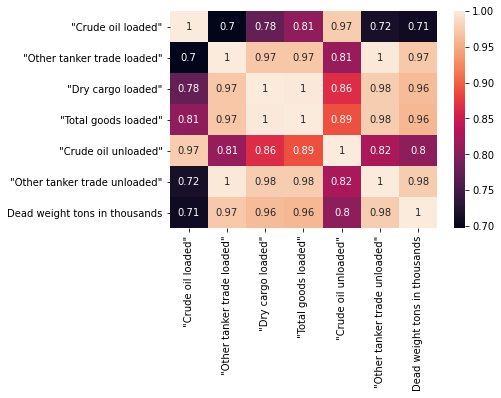

In [204]:
sns.heatmap(fleet_seatrade.corr(), annot= True)
plt.savefig('../Resources/fleet_seatrade.png')

In [167]:
# In order to see the relation betwwen GDP and seatrade we are going to merge the dataframes
GDPtotal_world = pd.read_csv('../Data/Def_Data/GDP_world.csv')
sea_trade = pd.read_csv('../Data/Def_Data/df_sea_trade.csv')
trade_GDPtotal_rel = sea_trade.merge(GDPtotal_world, how='left')

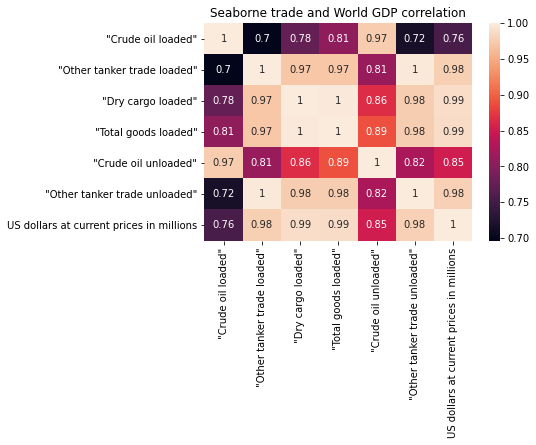

In [168]:
trade_GDPtotal_rel = trade_GDPtotal_rel.drop(columns=['Unnamed: 0', 'Year', 'Series Label', 'Economy', 'US dollars at current prices per capita', 'US dollars at constant prices (2015) in millions', 'US dollars at constant prices (2015) per capita'])
correl_GDPworld = trade_GDPtotal_rel.corr()
sns.heatmap(correl_GDPworld, annot= True)
plt.title('Seaborne trade and World GDP correlation')
plt.savefig('../Resources/seatrade_world_GDP.png')

In [169]:
# Now we are going to do the same correlation focused on developed economies

In [170]:
dev_seatrade = pd.read_csv('../Data/Def_Data/Dev_countries_Seatrade.csv')
GDP20 = pd.read_csv('../Data/Def_Data/GDP_G20.csv')
dev_seatrade= dev_seatrade.drop(columns='Unnamed: 0', axis=1)
dev_seatrade

,"""Crude oil loaded""","""Crude oil unloaded""","""Dry cargo loaded""","""Dry cargo unloaded""","""Other tanker trade loaded""","""Other tanker trade unloaded""","""Total goods loaded""","""Total goods unloaded""",Year
0,123.00670,1255.7810,1358.5558,2297.8599,332.18322,522.24620,1813.7458,4075.8869,2006.0
1,121.79014,1218.9860,1454.5596,2168.7966,359.01300,506.71970,1935.3633,3894.5019,2007.0
2,112.31863,1223.8302,1462.5501,2176.2633,401.46049,504.64200,1976.3293,3904.7360,2008.0
3,102.01586,1103.8527,1332.0599,1658.4060,379.07170,516.03300,1813.1470,3278.2921,2009.0
4,109.06895,1133.6316,1394.5615,1827.6153,414.21070,526.35530,1917.8416,3487.6025,2010.0
5,102.14281,1058.0704,1459.4616,1896.3261,441.53090,563.96200,2003.1353,3518.3589,2011.0
6,109.63740,1060.7113,1573.2249,1944.2990,439.16750,537.74820,2122.0302,3542.7580,2012.0
7,99.95691,980.1824,1620.3151,2032.8490,435.74040,533.13890,2156.0130,3546.1710,2013.0
8,109.69723,937.0109,1579.8542,2110.2041,425.50880,500.26730,2115.0598,3547.4820,2014.0
9,116.11843,966.6769,1623.1542,2108.3341,428.34510,510.82920,2167.6181,3585.8400,2015.0


In [171]:
GDP20.reset_index(drop=True)
GDP20 = GDP20.iloc[36:,:]
GDP20 = GDP20.reset_index(drop= True)
GDP20

,Unnamed: 0,Year,Series Label,Economy,Economy Label,US dollars at current prices in millions,US dollars at current prices per capita,US dollars at constant prices (2015) in millions,US dollars at constant prices (2015) per capita
0,15004,2006,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",4.562550e+07,10408.369,5.120726e+07,11681.715
1,15428,2007,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.112797e+07,11558.193,5.330650e+07,12050.680
2,15853,2008,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.549467e+07,12433.312,5.422184e+07,12148.142
3,16279,2009,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.274051e+07,11712.410,5.336511e+07,11851.120
4,16705,2010,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.730461e+07,12616.298,5.565709e+07,12253.578
5,17131,2011,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.341933e+07,13844.687,5.748053e+07,12548.225
6,17558,2012,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.432403e+07,13926.285,5.891229e+07,12754.631
7,17986,2013,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.601443e+07,14177.161,6.050819e+07,12994.649
8,18414,2014,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.779221e+07,14444.802,6.234962e+07,13285.125
9,18842,2015,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.437254e+07,13611.686,6.437254e+07,13611.686


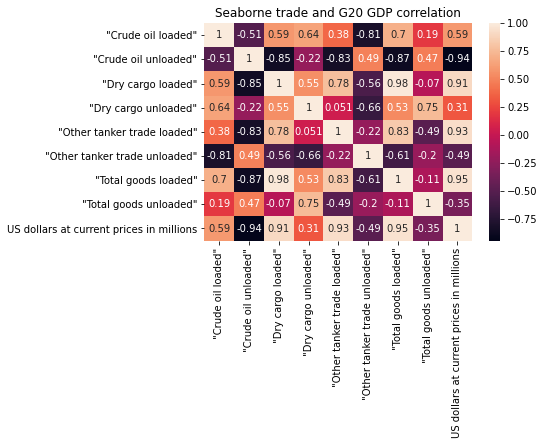

In [172]:
dev_sea_rel = dev_seatrade.merge(GDP20, how='left')
dev_sea_rel = dev_sea_rel.drop(columns=['Year', 'Series Label', 'Economy', 'US dollars at current prices per capita', 'US dollars at constant prices (2015) in millions', 'US dollars at constant prices (2015) per capita'])
dev_sea_rel = dev_sea_rel.drop(columns=['Unnamed: 0', 'Economy Label'], axis=1)
sns.heatmap(dev_sea_rel.corr(), annot= True)
plt.title('Seaborne trade and G20 GDP correlation')
plt.savefig('../Resources/trade_G20gdp_corr.png')

In [173]:
# This other correlation matrix show that when treating with oil trade, there´s less correlation, which suggest developed countries are investing in other sources of energy

In [174]:
# Now we want to see the correlation with oil price to see if oil has as much influence than GDP
Brent_price = Brent_yearly['Brent price']
size_diff = sea_trade.index.size - Brent_price.index.size
Brent_price.index = sea_trade.index[size_diff:]
sea_trade_Brent = pd.concat([sea_trade, Brent_price], axis=1)
sea_trade_Brent.drop(columns=['Unnamed: 0', 'YEAR'])

,"""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded""",Brent price
0,1207.000,233.0000,1165.000,2605.000,1101.000,298.0000,NaN
1,1210.000,320.0000,1162.000,2692.000,1199.000,300.0000,NaN
2,1321.000,332.0000,1221.000,2874.000,1325.000,316.0000,NaN
3,1514.000,353.0000,1407.000,3274.000,1521.000,339.0000,NaN
4,1497.000,335.0000,1472.000,3304.000,1470.000,312.0000,NaN
5,1364.000,280.0000,1428.000,3072.000,1373.000,287.0000,NaN
6,1555.000,289.0000,1522.000,3366.000,1522.000,312.0000,NaN
7,1599.000,293.0000,1576.000,3468.000,1585.000,321.0000,NaN
8,1604.000,296.0000,1650.000,3550.000,1634.000,321.0000,NaN
9,1725.000,318.0000,1785.000,3828.000,1724.000,308.0000,NaN


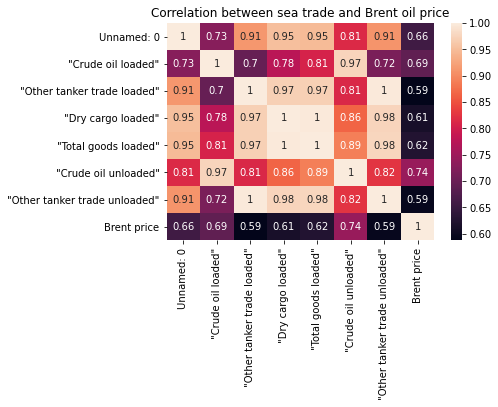

In [175]:
sns.heatmap(sea_trade_Brent.corr(), annot= True)
plt.title("Correlation between sea trade and Brent oil price")
plt.savefig('../Resources/seatrade_Brent.png')